In [1]:
from sys import platform, path
if platform == "linux" or platform == "linux2":
    path.append('/home/dariusbuhai/python/lib/python3.10/site-packages')

if platform == "darwin":
    path.append('/Library/Frameworks/Python.framework/Versions/3.9/venv/lib/python3.9/site-packages')

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

posts_features = pd.read_csv("../data/posts_features.csv", na_values='-')
posts_features = posts_features.fillna(0)

32886192.0


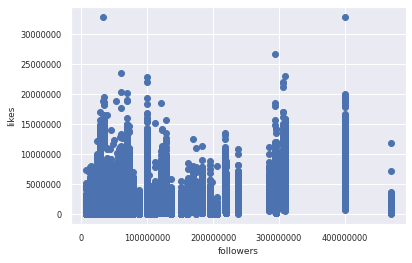

In [45]:
print(max(posts_features['likes']))
posts_features_filtered = posts_features[posts_features['likes']>10000]
plt.scatter(posts_features_filtered['followers'], posts_features_filtered['likes'])
plt.xlabel("followers")
plt.ylabel("likes")
plt.ticklabel_format(style="plain")
plt.show()

In [4]:
posts_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272407 entries, 0 to 272406
Columns: 222 entries, Unnamed: 0 to word: true
dtypes: bool(12), float64(9), int64(201)
memory usage: 439.6 MB


In [5]:
posts_features[['followers', 'likes', 'likes/followers', 'likes/mean', 'comments', 'faces', 'smiles']].describe()

,followers,likes,likes/followers,likes/mean,comments,faces,smiles
count,2.724070e+05,2.724070e+05,272407.000000,272407.000000,2.724070e+05,272407.000000,272407.000000
mean,5.271700e+07,8.649256e+05,0.023747,0.972137,7.686844e+03,0.645960,0.279310
std,6.218644e+07,1.237337e+06,0.033871,0.989218,6.818749e+04,0.970313,0.588061
min,7.300000e+06,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2.120000e+07,1.988100e+05,0.005074,0.338236,8.950000e+02,0.000000,0.000000
50%,3.320000e+07,5.019610e+05,0.013023,0.739555,2.608000e+03,0.000000,0.000000
75%,5.470000e+07,1.059776e+06,0.029117,1.300512,6.902000e+03,1.000000,0.000000
max,4.696000e+08,3.288619e+07,1.002107,35.032283,2.340551e+07,28.000000,23.000000


In [6]:
important_features = posts_features.loc[:, ~posts_features.columns.isin(['likes', 'likes/followers', 'comments', 'engagement'])]
correlation = important_features.corr(method='pearson')
columns = correlation.nlargest(10, 'likes/mean').index
columns

Index(['likes/mean', 'faces', 'smiles', 'word: happi', 'word: birthday',
       'word: reel', 'word: bless', 'word: babi', 'word: vida', 'mean'],
      dtype='object')

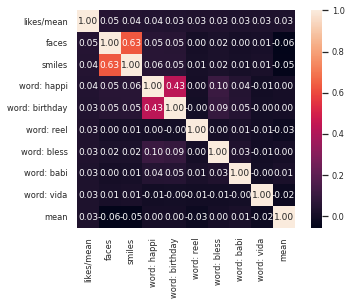

In [7]:
import numpy as np
import seaborn as sns
correlation_map = np.corrcoef(important_features[columns].values.astype(float).T)
sns.set(font_scale=0.75)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

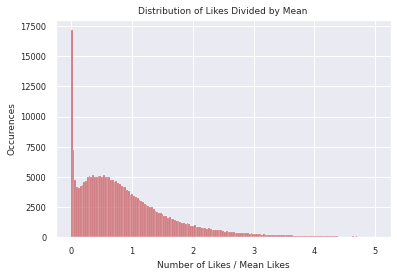

In [16]:
sns.histplot(important_features['likes/mean'][important_features['likes/mean']<5], color="r", kde=False)
plt.title("Distribution of Likes Divided by Mean")
plt.ylabel("Occurences")
plt.xlabel("Number of Likes / Mean Likes");

In [8]:
X, y = posts_features.loc[:, ~posts_features.columns.isin(['Unnamed: 0', 'likes', 'likes/followers','followers', 'comments', 'engagement', 'likes/mean', 'mean'])], posts_features['likes/mean']

In [9]:
from matplotlib import pyplot

def plotFeaturesImportance(model):
    importance = model.feature_importances_
    importance_and_names = list()
    # summarize feature importance
    for i, v in enumerate(importance):
        importance_and_names.append({'name': model.feature_names_in_[i], 'importance': v})
    importance_and_names.sort(key=lambda x: x['importance'], reverse=True)
    for f in importance_and_names:
        print(f"Feature: {f['name']}, importance: {f['importance']}")

    # plot feature importance
    limit_items = 20
    pyplot.barh([x['name'] for x in importance_and_names[:limit_items]][::-1], [x['importance'] for x in importance_and_names[:limit_items]][::-1])
    pyplot.show()

Feature: faces, importance: 0.03229945552729712
Feature: smiles, importance: 0.030505650451851267
Feature: (17, 22), importance: 0.02782300581823638
Feature: (12, 17), importance: 0.02261118534530509
Feature: Thursday, importance: 0.021317839784769088
Feature: Friday, importance: 0.019894899423591274
Feature: Tuesday, importance: 0.01980649762469207
Feature: Saturday, importance: 0.01961744254251792
Feature: Wednesday, importance: 0.01915201965871097
Feature: Monday, importance: 0.019023200470695285
Feature: (8, 12), importance: 0.017949544289794554
Feature: (2, 8), importance: 0.016806902898339
Feature: Sunday, importance: 0.016323820021096447
Feature: word: love, importance: 0.015802036719741546
Feature: word: thi, importance: 0.014947546514970973
Feature: word: thank, importance: 0.009251241901395282
Feature: word: time, importance: 0.00868640560048905
Feature: word: ucl, importance: 0.008504542798358081
Feature: word: para, importance: 0.007594194714588147
Feature: word: video, imp

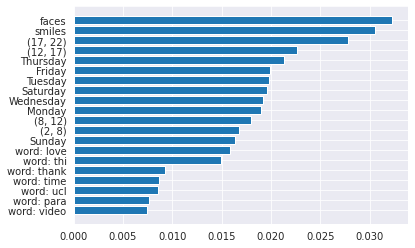

In [10]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X, y)
plotFeaturesImportance(model1)

Feature: faces, importance: 0.03313992513678686
Feature: smiles, importance: 0.030565945767243096
Feature: (17, 22), importance: 0.026483121858356915
Feature: (12, 17), importance: 0.022830673612696174
Feature: Saturday, importance: 0.019839661195867844
Feature: Wednesday, importance: 0.019517213420801326
Feature: Tuesday, importance: 0.018437200399632286
Feature: Thursday, importance: 0.01838019771953706
Feature: (2, 8), importance: 0.017578033412455427
Feature: Monday, importance: 0.017526708567852874
Feature: Friday, importance: 0.01649033657799903
Feature: word: love, importance: 0.01625519712807099
Feature: (8, 12), importance: 0.016116062120101745
Feature: Sunday, importance: 0.015498441894218878
Feature: word: thi, importance: 0.014318924832485973
Feature: word: film, importance: 0.011928354018104192
Feature: word: time, importance: 0.01041959220953906
Feature: word: ucl, importance: 0.008978255561054667
Feature: word: video, importance: 0.00853500498928459
Feature: word: esta, 

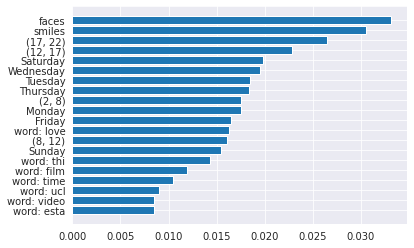

In [11]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()
model2.fit(X, y)
plotFeaturesImportance(model2)